# Rosalind Problems

In this notebook i look through several bioinformatics problems from the Rosalind platform, using [Biopython](https://biopython.org/) and [NetworkX](https://networkx.org/) packages.

[Rosalind](http://rosalind.info/problems/locations/) is a platform for learning bioinformatics and programming through problem solving.  

The problems can be found [here](http://rosalind.info/problems/list-view/).

The GitHub repository for this project can be found [here](https://github.com/nicksento/Rosalind).


# Import Libraries

In [1]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils import GC
from Bio import motifs

import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

# Counting DNA Nucleotides

In [2]:
def Counting_DNA_Nucleotides(dna):
    """
    Given a DNA string s, prints the respective number 
    of times that the symbols 'A', 'C', 'G', and 'T' occur in s
    """
    seq = Seq(dna)
    print("Adenine  (A):{} \nCytosine (C):{}"
      "\nGuanine  (G):{} \nThymine  (T):{}".format(seq.count("A"),
                                                 seq.count("C"),
                                                 seq.count("G"),
                                                 seq.count("T")))

In [3]:
dna = "AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC"

In [4]:
Counting_DNA_Nucleotides(dna)

Adenine  (A):20 
Cytosine (C):12
Guanine  (G):17 
Thymine  (T):21


# Transcribe DNA into RNA

There is a built-in function in the Biopython package for transcribing

In [5]:
dna = Seq("GATGGAACTTGACTACGTAAATT")

In [6]:
rna = dna.transcribe()
print(rna)

GAUGGAACUUGACUACGUAAAUU


# Complementing a Strand of DNA

There is a built-in function in the Biopython package that returns the reverse complement of a DNA string.

In [7]:
seq = Seq("AAAACCCGGT")
rev_com = seq.reverse_complement()
print(rev_com)

ACCGGGTTTT


# Computing GC Content

In [8]:
def Computing_GC_Content(data_path):
    """
    Given DNA strings in FASTA format, prints the ID of the string having 
    the highest GC-content, followed by the GC-content of that string.
    """
    max = 0
    for seq_record in SeqIO.parse(data_path, "fasta"):
        if GC(seq_record.seq) > max:
            max = GC(seq_record.seq)
            id = seq_record.id
    print(id)    
    print(max)

In [9]:
data_path = 'data/Computing_GC_Content.fasta'
Computing_GC_Content(data_path)

Rosalind_0808
60.91954022988506


# Counting Point Mutations

In [10]:
def Counting_Point_Mutations(seq1, seq2):
    """
    Given two DNA strings seq1 and seq2 of equal length,
    prints The Hamming distance dH(seq1,seq2)
    """
    count = 0
    for i in range(len(seq1)):
          if (seq1[i] != seq2[i]):
              count += 1
    print(count)

In [11]:
seq1 = "GAGCCTACTAACGGGAT"
seq2 = "CATCGTAATGACGGCCT"

In [12]:
Counting_Point_Mutations(seq1, seq2)

7


# Translating RNA into Protein

There is a built-in function in the Biopython package that translates an mRNA string into Protein. 

In [13]:
mRNA = Seq("AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA")
print(mRNA.translate())

MAMAPRTEINSTRING*


# Finding a Motif in DNA

In [14]:
def find_motif(seq1, seq2):
    """
    Given two DNA strings seq1 and seq2,
    prints all locations of seq2 as a substring of seq1.
    """
    instances = [Seq(seq2)]
    m = motifs.create(instances)
    position = []
    for pos, seq in m.instances.search(seq1):
        position.append(pos+1)
    print(*position)

In [15]:
seq1 = "GATATATGCATATACTT"
seq2 = "ATAT"

In [16]:
find_motif(seq1, seq2)

2 4 10


# Consensus and Profile

In [17]:
def Consensus_and_Profile(data_path):
    """
    Given a collection of DNA strings of equal length in FASTA format,
    prints a consensus string and profile matrix for the collection. 
    """
    instances = []
    for seq_record in SeqIO.parse(data_path, "fasta"):
        instances.append(seq_record.seq)
    m = motifs.create(instances)
    print(m.consensus)
    print('A:', *m.counts["A"])
    print('C:', *m.counts["C"])
    print('G:', *m.counts["G"])
    print('T:', *m.counts["T"])

In [18]:
data_path = "data/Consensus_and_Profile.fasta"
Consensus_and_Profile(data_path)

ATGCAACT
A: 5 1 0 0 5 5 0 0
C: 0 0 1 4 2 0 6 1
G: 1 1 6 3 0 1 0 0
T: 1 5 0 0 0 1 1 6


# Overlap Graphs

In [19]:
def Overlap_Graphs(data_path):
    """
    Given a collection of DNA strings in FASTA format,
    prints the adjacency list corresponding to O3 and 
    draws the corresponding graph.
    """
    P = [] #P.append(seq_record)
    id = []
    str_rec = []
    for seq_record in SeqIO.parse(data_path, "fasta"):
        P.append(list(seq_record.seq))
        id.append(seq_record.id)
        str_rec.append(str(seq_record.seq))
    edges = []
    for i in range (len(P)):
        for j in range (len(P)):
            if ((P[i][-3:] == P[j][0:3]) & (i!=j)):
                print(id[i], id[j])  
                edges.append((str_rec[i],str_rec[j]))
    Draw_Graph(edges)

In [20]:
def Draw_Graph(edges):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos)
    plt.show()
    
    A = nx.nx_agraph.to_agraph(G)
    A.layout()
    A.draw('data/Overlap_Graphs.png')      

Rosalind_0498 Rosalind_2391
Rosalind_0498 Rosalind_0442
Rosalind_2391 Rosalind_2323


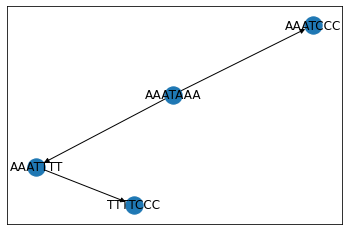

In [21]:
data_path = "data/Overlap_Graphs.fasta"
Overlap_Graphs(data_path)

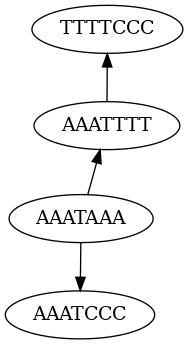

In [22]:
from IPython.display import Image
Image("data/Overlap_Graphs.png")

# Finding a Shared Motif

In [23]:
def Finding_a_Shared_Motif(data_path):
    """
    Given: A collection of DNA strings in FASTA format,
    prints a longest common substring of the collection.
    """    
    s = []
    for seq_record in SeqIO.parse(data_path, "fasta"):
        s.append(seq_record.seq)

    index = s.index(min(s, key=len))
    motif = ''
    shortest = s[index]

    for i in range(len(shortest)):
        n = 0
        present = True
        while present:
            for each in s:
                if shortest[i:i+n] not in each or n>1000:
                    present = False
                    break
            if present:
                motif = max(shortest[i:i+n], motif, key=len)
            n += 1
    print(motif)

In [24]:
data_path='data/Finding_a_Shared_Motif.fasta'
Finding_a_Shared_Motif(data_path)

CA


# Inferring mRNA from Protein

## RNA codon table

A table indicating the translation of individual RNA codons into amino acids for the purpose of protein creation.

In [25]:
from Bio.Data import CodonTable
print(CodonTable.generic_by_id[1])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [26]:
# This dictionary defines how many possible RNA equivalent each aminoacid has
protein_to_rna_dict = {'F':2,'L':6,'S':6,
                       'Y':2,'C':2,'W':1,
                       'P':4,'H':2,'Q':2,
                       'R':6,'I':3,'M':1,
                       'T':4,'N':2,'K':2,
                       'V':4,'A':4,'D':2,
                       'E':2,'G':4}
stop_codons = ['UAA','UGA','UAG']
num_stop_codons = 3

In [27]:
def Inferring_mRNA_from_Protein(aa_seq):
    """
    Given a protein string of amino acids,
    prints the total number of different RNA strings 
    from which the protein could have been translated, modulo 1,000,000.
    """
    num_dif = 1
    for i in aa_seq:
        num_dif = (num_dif * protein_to_rna_dict[i]) % 1000000
    num_dif = (num_dif * num_stop_codons)
    print(num_dif)

In [28]:
aa_seq = 'MA'
Inferring_mRNA_from_Protein(aa_seq)

12


# Rabbits and Recurrence Relations

In [29]:
def Rabbits(N,k):
    '''
    Returns the total number of rabbit pairs that will be present after n months,
    if we begin with 1 pair and in each generation,
    every pair of reproduction-age rabbits produces a litter of k rabbit pairs 
    
    N: months
    k: rabbit pairs
    '''
    if (N==1):
        return 1
    elif (N==2):
        return 1
    else: 
        return (Rabbits(N-1,k)+k*Rabbits(N-2,k))

In [30]:
Rabbits(5,3)

19

# Mendel's First Law

In [31]:
def mendel(k,m,n):
    """
    Given three positive integers k, m, and n, representing a population 
    containing k+m+n organisms: k individuals are homozygous dominant for a factor,
    m are heterozygous, and n are homozygous recessive,
    returns the probability that two randomly selected mating organisms 
    will produce an individual possessing a dominant allele 
    (and thus displaying the dominant phenotype) 
    assuming that any two organisms can mate.
    """
    population = k + m + n
    return    (k/population 
              + (m/population * k/(population-1))  
              + (m/population * (m-1)/(population-1))*3/4
              + (m/population * n/(population-1))*2/4
              + (n/population * k/(population-1)) 
              + (n/population * m/(population-1))*2/4)

In [32]:
k = 2
m = 2 
n = 2

In [33]:
mendel(k,m,n)

0.7833333333333333